<a href="https://colab.research.google.com/github/plaban1981/Acadgild_Capstone_Project/blob/master/FruitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# re-size all the images to this
IMAGE_SIZE = [100, 100]

Using TensorFlow backend.


In [5]:
import os
os.listdir('fruits-360')

['Test', 'LICENSE', 'Training', 'test-multiple_fruits', 'readme.md', 'papers']

In [0]:
#set  training and test dataset path
train_path = 'fruits-360/Training'
valid_path = 'fruits-360/Test'

In [7]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [0]:
# useful for getting number of classes
folders = glob('fruits-360/Training/*')

In [10]:
len(folders)

81

In [0]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# 
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
prediction

<tf.Tensor 'dense_1/Softmax:0' shape=(?, 81) dtype=float32>

In [0]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [14]:
# view the structure of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [0]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
#Training data generator
training_set = train_datagen.flow_from_directory('fruits-360/Training',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 41322 images belonging to 81 classes.


In [18]:
#Test Data generator
test_set = test_datagen.flow_from_directory('fruits-360/Test',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 13877 images belonging to 81 classes.


In [19]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
1292/1292 [==============================] - 219s 169ms/step - loss: 0.6410 - acc: 0.8765 - val_loss: 0.2769 - val_acc: 0.9395
Epoch 2/25
1292/1292 [==============================] - 214s 165ms/step - loss: 0.1112 - acc: 0.9813 - val_loss: 0.1641 - val_acc: 0.9691
Epoch 3/25
1292/1292 [==============================] - 215s 166ms/step - loss: 0.0630 - acc: 0.9878 - val_loss: 0.1402 - val_acc: 0.9604
Epoch 4/25
1292/1292 [==============================] - 214s 166ms/step - loss: 0.0438 - acc: 0.9906 - val_loss: 0.1147 - val_acc: 0.9647
Epoch 5/25
1292/1292 [==============================] - 209s 162ms/step - loss: 0.0365 - acc: 0.9910 - val_loss: 0.0993 - val_acc: 0.9745
Epoch 6/25
1292/1292 [==============================] - 208s 161ms/step - loss: 0.0303 - acc: 0.9917 - val_loss: 0.0840 - val_acc: 0.9758
Epoch 7/25
1292/1292 [==============================] - 208s 161ms/step - loss: 0.0283 - acc: 0.9916 - val_loss: 0.1222 - val_acc: 0.9645
Epoch 8/25
1292/1292 [============

# Access Model Training History in Keras

In [21]:
r.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


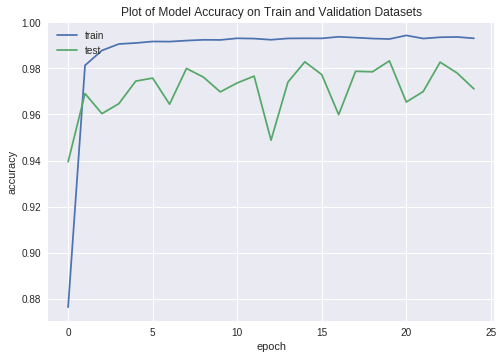

In [24]:
# list all data in history
print(r.history.keys())
# summarize history for accuracy
plt.plot(r.history['acc'])
plt.plot(r.history['val_acc'])
plt.title('Plot of Model Accuracy on Train and Validation Datasets')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Note
From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.


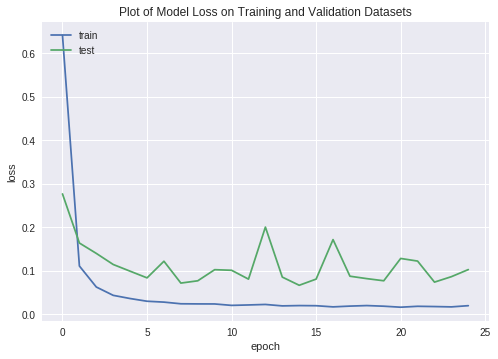

In [25]:
# summarize history for loss
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Plot of Model Loss on Training and Validation Datasets')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Note
From the plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test). If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.